In [1]:
import pandas as pd

### Download data from MTA

In [2]:
url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt"
df = pd.read_csv(url)

In [3]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
...,...,...,...,...,...,...,...,...,...,...,...
203790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/31/2019,09:00:00,REGULAR,5554,378
203791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/31/2019,12:10:52,REGULAR,5554,378
203792,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/31/2019,13:00:00,REGULAR,5554,378
203793,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/31/2019,17:00:00,REGULAR,5554,378


pseudo code
- calculate the number of people entering each station for every timestamp
    - the number of entries is cumulative (when does it reset to 0?)
- calculate the number of people exiting each station for every timestamp

In [4]:
df.columns = df.columns.str.replace(' ', '')

In [5]:
df_max = df.groupby(['STATION', 'SCP']).max()
df_max.rename(columns={'ENTRIES': 'ENTRIES_MAX'}, inplace=True)
df_max.rename(columns={'EXITS': 'EXITS_MAX'}, inplace=True)
df_min = df.groupby(['STATION', 'SCP']).min()
df_min.rename(columns={'ENTRIES': 'ENTRIES_MIN'}, inplace=True)
df_min.rename(columns={'EXITS': 'EXITS_MIN'}, inplace=True)

In [6]:
df_max

C/A  UNIT LINENAME DIVISION        DATE      TIME  \
STATION   SCP                                                            
1 AV      00-00-00  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-00-01  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-00  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-01  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-02  H007  R248        L      BMT  05/31/2019  20:00:00   
...                  ...   ...      ...      ...         ...       ...   
ZEREGA AV 00-00-01  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-03-00  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-03-01  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-05-00  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-05-01  R419  R326        6      IRT  05/31/2019  21:00:00   

                       DESC  ENTRIES_MAX  EXITS_MAX  
STATION   SCP                                        
1 AV      00-00-00  REGULAR     14733384   16466297  
          00-00-01  REGULAR     60282137   37783552  
          00-03-00  REGULAR    370663354  387783506  
          00-03-01  REGULAR      2451436    1050322  
          00-03-02  REGULAR      6386503     536941  
...                     ...          ...        ...  
ZEREGA AV 00-00-01  REGULAR       116264     189307  
          00-03-00  REGULAR       912373     409360  
          00-03-01  REGULAR       807786     144208  
          00-05-00  REGULAR          204          0  
          00-05-01  REGULAR           39        148  

[4310 rows x 9 columns]

In [7]:
df_min

C/A  UNIT LINENAME DIVISION        DATE      TIME  \
STATION   SCP                                                            
1 AV      00-00-00  H007  R248        L      BMT  05/25/2019  00:00:00   
          00-00-01  H007  R248        L      BMT  05/25/2019  00:00:00   
          00-03-00  H007  R248        L      BMT  05/25/2019  00:00:00   
          00-03-01  H007  R248        L      BMT  05/25/2019  00:00:00   
          00-03-02  H007  R248        L      BMT  05/25/2019  00:00:00   
...                  ...   ...      ...      ...         ...       ...   
ZEREGA AV 00-00-01  R419  R326        6      IRT  05/25/2019  01:00:00   
          00-03-00  R419  R326        6      IRT  05/25/2019  01:00:00   
          00-03-01  R419  R326        6      IRT  05/25/2019  01:00:00   
          00-05-00  R419  R326        6      IRT  05/25/2019  01:00:00   
          00-05-01  R419  R326        6      IRT  05/25/2019  01:00:00   

                       DESC  ENTRIES_MIN  EXITS_MIN  
STATION   SCP                                        
1 AV      00-00-00  REGULAR     14719444   16451172  
          00-00-01  REGULAR     60265802   37777649  
          00-03-00  REGULAR    370659660  387778567  
          00-03-01  REGULAR      2448439    1048950  
          00-03-02  REGULAR      6381813     536599  
...                     ...          ...        ...  
ZEREGA AV 00-00-01  REGULAR       114471     186418  
          00-03-00  REGULAR       908590     407714  
          00-03-01  REGULAR       801097     142894  
          00-05-00  REGULAR          203          0  
          00-05-01  REGULAR           39        148  

[4310 rows x 9 columns]

In [8]:
df1=pd.concat([df_max, df_min], axis=1, join='inner')
df1

C/A  UNIT LINENAME DIVISION        DATE      TIME  \
STATION   SCP                                                            
1 AV      00-00-00  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-00-01  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-00  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-01  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-02  H007  R248        L      BMT  05/31/2019  20:00:00   
...                  ...   ...      ...      ...         ...       ...   
ZEREGA AV 00-00-01  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-03-00  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-03-01  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-05-00  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-05-01  R419  R326        6      IRT  05/31/2019  21:00:00   

                       DESC  ENTRIES_MAX  EXITS_MAX   C/A  UNIT LINENAME  \
STATION   SCP                                                              
1 AV      00-00-00  REGULAR     14733384   16466297  H007  R248        L   
          00-00-01  REGULAR     60282137   37783552  H007  R248        L   
          00-03-00  REGULAR    370663354  387783506  H007  R248        L   
          00-03-01  REGULAR      2451436    1050322  H007  R248        L   
          00-03-02  REGULAR      6386503     536941  H007  R248        L   
...                     ...          ...        ...   ...   ...      ...   
ZEREGA AV 00-00-01  REGULAR       116264     189307  R419  R326        6   
          00-03-00  REGULAR       912373     409360  R419  R326        6   
          00-03-01  REGULAR       807786     144208  R419  R326        6   
          00-05-00  REGULAR          204          0  R419  R326        6   
          00-05-01  REGULAR           39        148  R419  R326        6   

                   DIVISION        DATE      TIME     DESC  ENTRIES_MIN  \
STATION   SCP                                                             
1 AV      00-00-00      BMT  05/25/2019  00:00:00  REGULAR     14719444   
          00-00-01      BMT  05/25/2019  00:00:00  REGULAR     60265802   
          00-03-00      BMT  05/25/2019  00:00:00  REGULAR    370659660   
          00-03-01      BMT  05/25/2019  00:00:00  REGULAR      2448439   
          00-03-02      BMT  05/25/2019  00:00:00  REGULAR      6381813   
...                     ...         ...       ...      ...          ...   
ZEREGA AV 00-00-01      IRT  05/25/2019  01:00:00  REGULAR       114471   
          00-03-00      IRT  05/25/2019  01:00:00  REGULAR       908590   
          00-03-01      IRT  05/25/2019  01:00:00  REGULAR       801097   
          00-05-00      IRT  05/25/2019  01:00:00  REGULAR          203   
          00-05-01      IRT  05/25/2019  01:00:00  REGULAR           39   

                    EXITS_MIN  
STATION   SCP                  
1 AV      00-00-00   16451172  
          00-00-01   37777649  
          00-03-00  387778567  
          00-03-01    1048950  
          00-03-02     536599  
...                       ...  
ZEREGA AV 00-00-01     186418  
          00-03-00     407714  
          00-03-01     142894  
          00-05-00          0  
          00-05-01        148  

[4310 rows x 18 columns]

In [9]:
df1['PEOPLE_IN'] = df1['ENTRIES_MAX']-df1['ENTRIES_MIN']
df1['PEOPLE_OUT'] = df1['EXITS_MAX']-df1['EXITS_MIN']
df1

C/A  UNIT LINENAME DIVISION        DATE      TIME  \
STATION   SCP                                                            
1 AV      00-00-00  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-00-01  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-00  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-01  H007  R248        L      BMT  05/31/2019  20:00:00   
          00-03-02  H007  R248        L      BMT  05/31/2019  20:00:00   
...                  ...   ...      ...      ...         ...       ...   
ZEREGA AV 00-00-01  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-03-00  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-03-01  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-05-00  R419  R326        6      IRT  05/31/2019  21:00:00   
          00-05-01  R419  R326        6      IRT  05/31/2019  21:00:00   

                       DESC  ENTRIES_MAX  EXITS_MAX   C/A  UNIT LINENAME  \
STATION   SCP                                                              
1 AV      00-00-00  REGULAR     14733384   16466297  H007  R248        L   
          00-00-01  REGULAR     60282137   37783552  H007  R248        L   
          00-03-00  REGULAR    370663354  387783506  H007  R248        L   
          00-03-01  REGULAR      2451436    1050322  H007  R248        L   
          00-03-02  REGULAR      6386503     536941  H007  R248        L   
...                     ...          ...        ...   ...   ...      ...   
ZEREGA AV 00-00-01  REGULAR       116264     189307  R419  R326        6   
          00-03-00  REGULAR       912373     409360  R419  R326        6   
          00-03-01  REGULAR       807786     144208  R419  R326        6   
          00-05-00  REGULAR          204          0  R419  R326        6   
          00-05-01  REGULAR           39        148  R419  R326        6   

                   DIVISION        DATE      TIME     DESC  ENTRIES_MIN  \
STATION   SCP                                                             
1 AV      00-00-00      BMT  05/25/2019  00:00:00  REGULAR     14719444   
          00-00-01      BMT  05/25/2019  00:00:00  REGULAR     60265802   
          00-03-00      BMT  05/25/2019  00:00:00  REGULAR    370659660   
          00-03-01      BMT  05/25/2019  00:00:00  REGULAR      2448439   
          00-03-02      BMT  05/25/2019  00:00:00  REGULAR      6381813   
...                     ...         ...       ...      ...          ...   
ZEREGA AV 00-00-01      IRT  05/25/2019  01:00:00  REGULAR       114471   
          00-03-00      IRT  05/25/2019  01:00:00  REGULAR       908590   
          00-03-01      IRT  05/25/2019  01:00:00  REGULAR       801097   
          00-05-00      IRT  05/25/2019  01:00:00  REGULAR          203   
          00-05-01      IRT  05/25/2019  01:00:00  REGULAR           39   

                    EXITS_MIN  PEOPLE_IN  PEOPLE_OUT  
STATION   SCP                                         
1 AV      00-00-00   16451172      13940       15125  
          00-00-01   37777649      16335        5903  
          00-03-00  387778567       3694        4939  
          00-03-01    1048950       2997        1372  
          00-03-02     536599       4690         342  
...                       ...        ...         ...  
ZEREGA AV 00-00-01     186418       1793        2889  
          00-03-00     407714       3783        1646  
          00-03-01     142894       6689        1314  
          00-05-00          0          1           0  
          00-05-01        148          0           0  

[4310 rows x 20 columns]

In [10]:
df_sum = df1.groupby(['STATION']).sum()
df_sum

,ENTRIES_MAX,EXITS_MAX,ENTRIES_MIN,EXITS_MIN,PEOPLE_IN,PEOPLE_OUT
STATION,,,,,,
1 AV,1413834594,1464083048,1413746052,1463976840,88542,106208
103 ST,113152109,578791113,25283251,22239950,87868858,556551163
103 ST-CORONA,71587722,71917318,71468040,71828291,119682,89027
104 ST,4844670474,3527377330,1695377790,994241116,3149292684,2533136214
110 ST,37950900,36289712,37890745,36234116,60155,55596
...,...,...,...,...,...,...
WOODLAWN,30537498,11906760,30498068,11897286,39430,9474
WORLD TRADE CTR,1597653337,1841107583,1597554837,1841026208,98500,81375
WTC-CORTLANDT,734113689,2325853,734034687,2257692,79002,68161


In [52]:
df_sum['PEOPLE_IN_OUT'] = df_sum['PEOPLE_IN'] + df_sum['PEOPLE_OUT']
df_sum = df_sum.sort_values(['PEOPLE_IN_OUT'], ascending=False)
df_sum['PERCENT_OF_TOTAL'] = df_sum['PEOPLE_IN_OUT']/df_sum['PEOPLE_IN_OUT'].sum()*100

In [56]:
df_sum.head(30)

,ENTRIES_MAX,EXITS_MAX,ENTRIES_MIN,EXITS_MIN,PEOPLE_IN,PEOPLE_OUT,PEOPLE_IN_OUT,PERCENT_OF_TOTAL
STATION,,,,,,,,
23 ST,5448901946,4856255307,104672558,61578367,5344229388,4794676940,10138906328,9.632157
42 ST-PORT AUTH,7481477170,6156266498,2215213153,2285612885,5266264017,3870653613,9136917630,8.680249
CANAL ST,3589654305,4925859103,1126164836,633393456,2463489469,4292465647,6755955116,6.418288
59 ST,4087155638,2317007496,127528642,87866758,3959626996,2229140738,6188767734,5.879449
14 ST,4555721354,3214593509,1167953357,510290753,3387767997,2704302756,6092070753,5.787585
125 ST,5115341969,2843366717,1183280570,855800113,3932061399,1987566604,5919628003,5.623761
104 ST,4844670474,3527377330,1695377790,994241116,3149292684,2533136214,5682428898,5.398417
TIMES SQ-42 ST,5800080217,4462398820,2169951498,2677001006,3630128719,1785397814,5415526533,5.144855
DEKALB AV,3386639525,2030290525,38750946,18466321,3347888579,2011824204,5359712783,5.091831


In [60]:
df_sum['C_PERCENTAGE'] = df_sum['PERCENT_OF_TOTAL'].cumsum()
df_sum.head(30)

,ENTRIES_MAX,EXITS_MAX,ENTRIES_MIN,EXITS_MIN,PEOPLE_IN,PEOPLE_OUT,PEOPLE_IN_OUT,PERCENT_OF_TOTAL,C_PERCENTAGE
STATION,,,,,,,,,
23 ST,5448901946,4856255307,104672558,61578367,5344229388,4794676940,10138906328,9.632157,9.632157
42 ST-PORT AUTH,7481477170,6156266498,2215213153,2285612885,5266264017,3870653613,9136917630,8.680249,18.312406
CANAL ST,3589654305,4925859103,1126164836,633393456,2463489469,4292465647,6755955116,6.418288,24.730694
59 ST,4087155638,2317007496,127528642,87866758,3959626996,2229140738,6188767734,5.879449,30.610143
14 ST,4555721354,3214593509,1167953357,510290753,3387767997,2704302756,6092070753,5.787585,36.397728
125 ST,5115341969,2843366717,1183280570,855800113,3932061399,1987566604,5919628003,5.623761,42.021489
104 ST,4844670474,3527377330,1695377790,994241116,3149292684,2533136214,5682428898,5.398417,47.419906
TIMES SQ-42 ST,5800080217,4462398820,2169951498,2677001006,3630128719,1785397814,5415526533,5.144855,52.564761
DEKALB AV,3386639525,2030290525,38750946,18466321,3347888579,2011824204,5359712783,5.091831,57.656592


In [40]:
import seaborn as sns

STATION
42 ST-PORT AUTH    9136917630
CANAL ST           6755955116
59 ST              6188767734
14 ST              6092070753
125 ST             5919628003
Name: PEOPLE_IN_OUT, dtype: int64


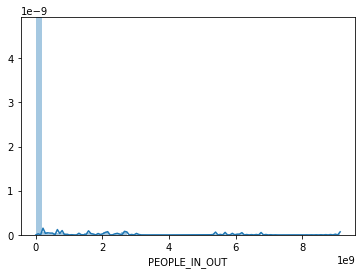

In [45]:
data = df_sum['PEOPLE_IN_OUT'][1:]
print(data.head())
sns.distplot(data, kde=True);